# Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting irises

In [27]:
df_iris = pd.read_csv("iris.csv")
df_iris.head(3)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# Replacing labels by numbers

In [28]:
categories = df_iris["label"].unique()
categories_dictionary = dict(zip(categories,range(len(categories))))
print(categories_dictionary)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [29]:
df_iris["label"] = df_iris["label"].replace(categories_dictionary)
df_iris["label"].unique()

array([0, 1, 2], dtype=int64)

# K-mean class

In [133]:
class KMean:
    def __init__(self,n_clusters):
        self.n_centers = n_clusters
        
    def fit_transform(self,X):
        n,m = X.shape
        centers = np.zeros((self.n_centers,m))
        new_centers = X[:self.n_centers,:].copy()
        y_labels = np.zeros((n,))
        distances = np.zeros((self.n_centers,))
        while not np.equal(centers, new_centers).all():
            centers = new_centers.copy()
            for i in range(n):
                for j in range(self.n_centers):
                    distances[j] = self.norm(X[i],centers[j])
                y_labels[i] = np.argmin(distances)
            for j in range(self.n_centers):
                new_centers[j] = X[y_labels == j].mean(axis = 0)
        return y_labels

    def norm(self,x,centroid):
        return (np.sum(x - centroid)**2)**0.5

# Clasterization

In [134]:
X = df_iris.values[:,:4]
y = df_iris["label"].values

In [137]:
k_mean = KMean(3)
new_labels = k_mean.fit_transform(X)

# Plots

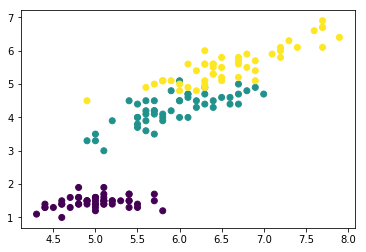

In [143]:
plt.scatter(X[:,0],X[:,2],c = y)
plt.show()

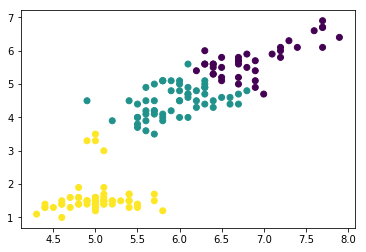

In [144]:
plt.scatter(X[:,0],X[:,2],c = new_labels)
plt.show()

# Accuracy

In [148]:
[len(X[y == 0]),len(X[y==1]),len(X[y==2])]

[50, 50, 50]

In [149]:
[len(X[new_labels == 0]),len(X[new_labels==1]),len(X[new_labels==2])]

[38, 58, 54]